# **Data Dictonary**

1. `Symboling` : Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. associated with a particular car model.
2. `normalized-losses` : Normalized losses refer to the average loss payment per insured vehicle
3. `make` : Name of car company
4. `fuel-type` : Car fuel type
5. `aspiration` : Aspiration used in the car
6. `num-of-doors` : Number of doors in a car
7. `body-style` : Shape and layout of the car's exterior of the car
8. `drive-wheels` : Type of drive wheel
9. `engine-location` : Location of the car engine
10. `wheel-base` : Weelbase of the car
11. `length` : Length of the car
12. `width` : Width of the car
13. `height` : Height of the car
14. `curb-weight` : The weight of a car without occupants or baggage
15. `engine-type` : Type of engine
16. `num-of-cylinders` : Cylinders placed in the car
17. `engine-size` : Size of the car engine
18. `fuel-system` : Fuel system of the car
19. `bore` : Boreratio of the car
20. `stroke` : Stroke length of the engine the distance that the piston travels inside the engine cylinder.
21. `compression-ratio` : Compression ratio of car
22. `horsepower` : Horsepower of the car
23. `peak-rpm` : The peak revolutions per minute of an engine of the car
24. `city-mpg` : Car's mileage in the city
25. `highway-mpg` : Car's mileage on highway
26. `price` : Price of the car

# **Tasks**

The following are the broad tasks to be performed on the project:

- Load the data into your code
- Perform EDA and a detailed analysis on the data.
- Prepare the data preprocessing pipelies.
- Apply the required preprocessing techniques on the data.
- Keep 20% of the data aside as test data.
- Apply different machine learning techniques.
- Report the following metrics using different regression models on the test data:
     - MSE
     - R2-score

- Prepare a brief report documenting the key steps involved along with the reasoning behind different decisions that you made in these steps.

# **Notes**

Write textual comments in your code wherever appropriate.

Note: As a data scientist, you might need to make several decisions while exploring the data feel free to do that and mention the same in the report.
Be as innovative and creative as possible. Visualize data wherever required.

#Task 1

Load the data into your code and import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [ ]:
df=pd.read_csv('/content/cars_price.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,...,152.0,mpfi,NaN,3.47,9.0,154,NaN,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,NaN,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,NaN,sedan,4wd,front,99.4,...,136.0,mpfi,NaN,3.4,8.0,115,5500,18.0,22.0,17450


# **Task 2 - Analyse the data using following functions:**

- head(),
- tail(),
- info(),
- describe() and
- isnull().sum(). Report your findings.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,27286.000000,27264.000000,27258.000000,27387.000000,27281.000000,27302.000000,27271.000000,27327.000000,27229.000000,27303.000000
mean,0.839075,98.807875,174.158302,65.918114,53.732059,2560.265988,127.322834,10.128243,25.158507,30.709885
std,1.239600,6.037800,12.366150,2.143679,2.438541,522.483478,41.863332,3.943566,6.517298,6.862626
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.500000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.900000,55.500000,2954.000000,146.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df.shape

(30330, 26)

# **Task 3 - Data Cleaning**

> Add blockquote



- Check and remove the duplicate rows
- Check the unique values of all categorical columns
- Check the data types of all columns and ensure they are correct (convert where required)
- Impute the missing values

In [ ]:
df.duplicated().sum()

4456

Very important step, reset the index

In [ ]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)
df.shape

(25874, 26)

We checked data types of all the columns

We checked the number of rows

we check the num of duplicates, we drop the duplicates, now we have a duplicate free dataset

In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,22961.000000,22930.000000,22921.000000,23054.000000,22934.000000,22977.000000,22944.000000,23007.000000,22916.000000,22972.000000
mean,0.842516,98.812290,174.168317,65.920114,53.733034,2560.221265,127.322394,10.121975,25.148543,30.700200
std,1.244124,6.044476,12.384015,2.148439,2.435949,521.624698,41.817912,3.941974,6.536613,6.883403
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.500000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.900000,55.500000,2954.000000,146.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df.describe(include='object')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,22953,22905,22982,23031,22971,22999,22884,23024,22962,22953,22930,23031,23063,22848,23001,22961
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500,?
freq,4660,3568,20773,18807,12819,10738,13272,22722,16472,17723,10560,2639,2261,2141,4133,482


**Below are the categorical features.**





In [ ]:
objective_features = [
    'make','fuel-type', 'aspiration', 'num-of-doors', 'body-style',
    'drive-wheels', 'engine-location', 'engine-type',
    'num-of-cylinders', 'fuel-system'
]

df_objective = df[objective_features]
df_objective

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,NaN,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,NaN,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,NaN,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,NaN,sedan,4wd,front,NaN,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
25869,subaru,gas,std,NaN,sedan,4wd,front,ohcf,four,2bbl
25870,mazda,gas,std,two,hatchback,rwd,front,rotor,two,mpfi
25871,toyota,gas,std,two,hatchback,rwd,front,dohc,four,mpfi
25872,porsche,gas,std,NaN,hatchback,rwd,front,ohc,four,mpfi


## Numerica Data Cleaning

our target feature price is object data type in the dataset

For the following features we have to change data type because these are continuous values, first we'll check value counts (frequency) of each unique item to figure out any wrong data input


In [ ]:
features = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

In [ ]:
for feature in features:
    print(f"Frequency Table for '{feature}':")
    print(df[feature].value_counts())
    print("\n")

Frequency Table for 'normalized-losses':
normalized-losses
?      4660
161    1294
91      870
150     800
104     710
134     678
128     645
102     606
94      570
85      557
65      546
95      538
168     535
103     529
74      514
93      468
106     459
122     435
148     434
118     413
125     346
137     338
83      325
154     322
115     318
101     311
197     248
153     242
188     238
145     236
113     233
119     232
108     232
81      230
194     228
110     227
129     225
89      214
87      209
158     207
164     205
192     198
121     126
256     125
77      123
90      114
142     113
186     112
231     110
98      107
78      102
107      96
Name: count, dtype: int64


Frequency Table for 'bore':
bore
3.62    2639
3.19    2231
3.15    1595
3.03    1376
2.97    1359
3.46    1020
3.31     920
3.43     889
3.78     834
3.27     811
2.91     795
3.54     705
3.39     676
3.58     672
3.05     666
3.7      584
3.01     540
3.35     453
?        439
3.59     

We first need to fix the incorrect input data. Below features are mentioned with the incorrect data. We'll first replace all incorrect datapoints with NaN value.

From the above mentioned features

normalized-losses ?

bore: ?        439

stroke: ?        441

horsepower: ?       220

peak-rpm: ?        210

price: ?	482



Then we converted them to float data-type

In [ ]:
df[features] = df[features].replace('?', np.nan)

In [ ]:
df[features] = df[features].astype(float)

In [ ]:
df.isnull().sum()

,0
symboling,2913
normalized-losses,7581
make,2969
fuel-type,2892
aspiration,2843
num-of-doors,2903
body-style,2875
drive-wheels,2990
engine-location,2850
wheel-base,2944


Below are numerical features.

In [ ]:
numerical_features = [
    'symboling','normalized-losses', 'wheel-base', 'length', 'width', 'height',
    'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
    'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]
df_numerical = df[numerical_features]


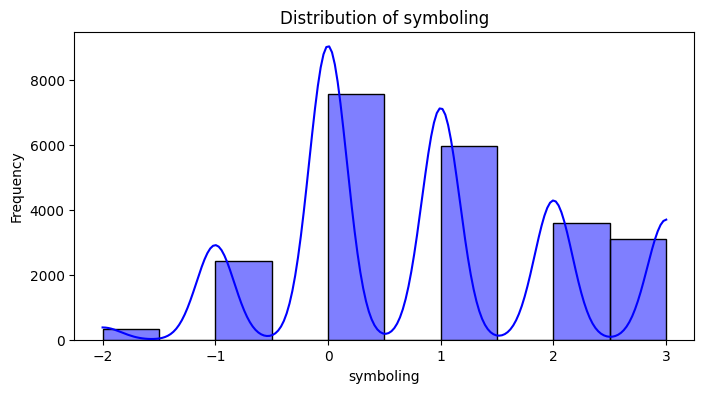

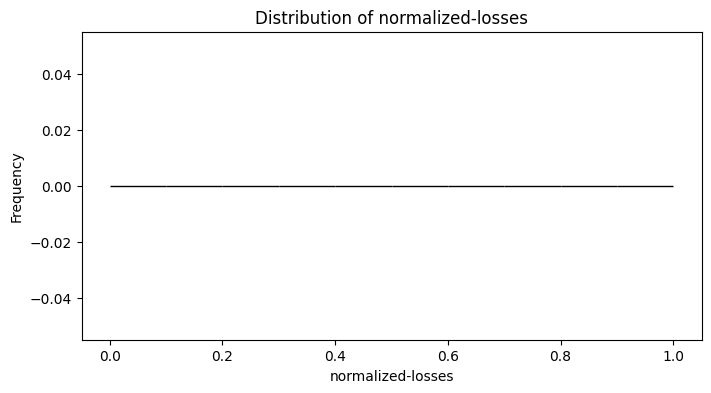

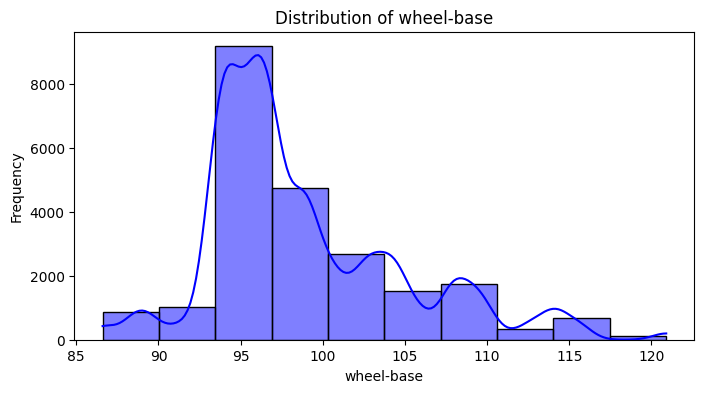

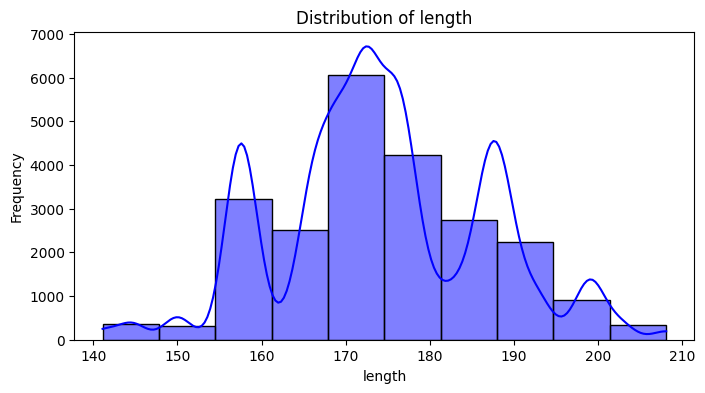

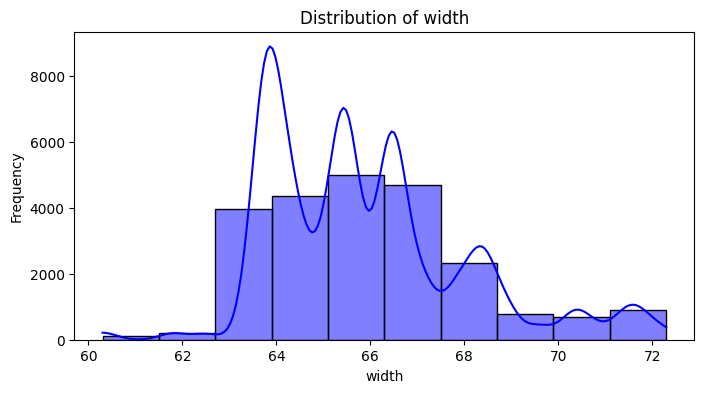

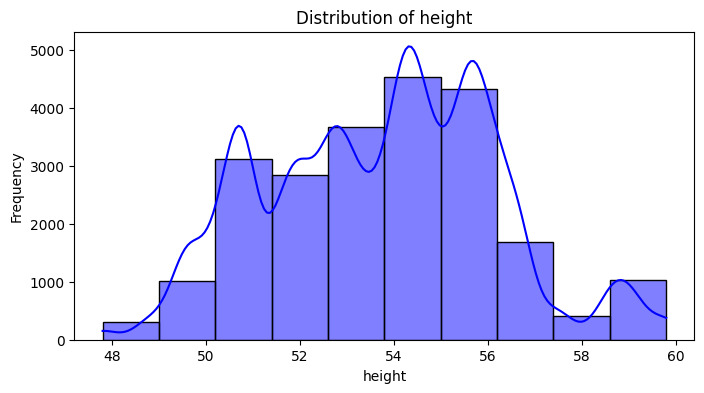

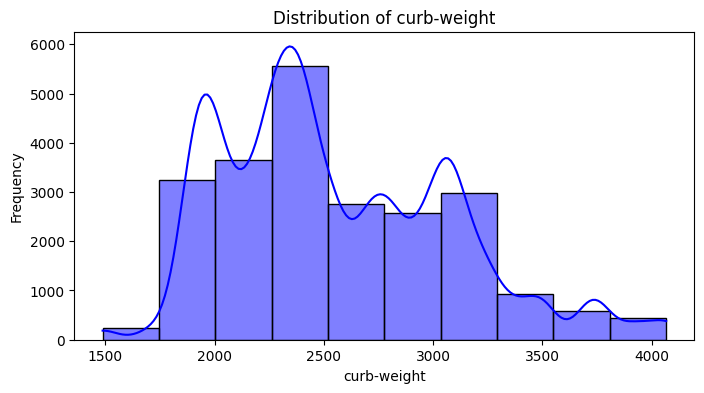

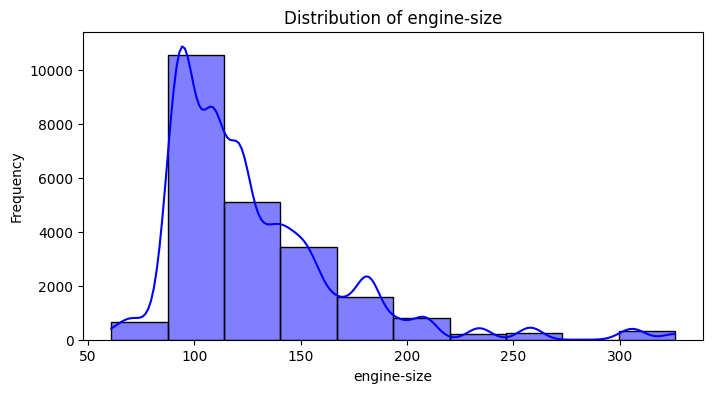

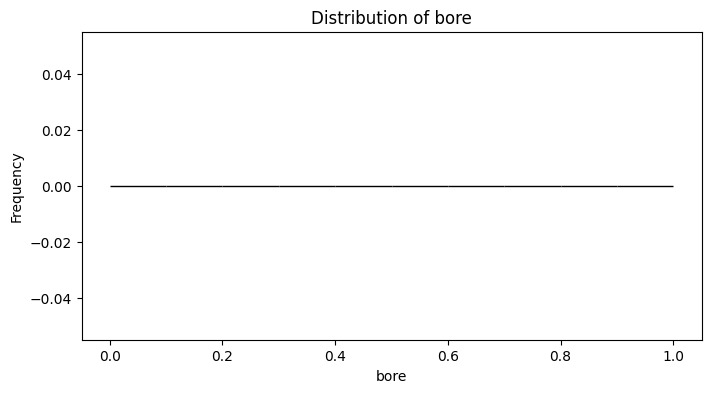

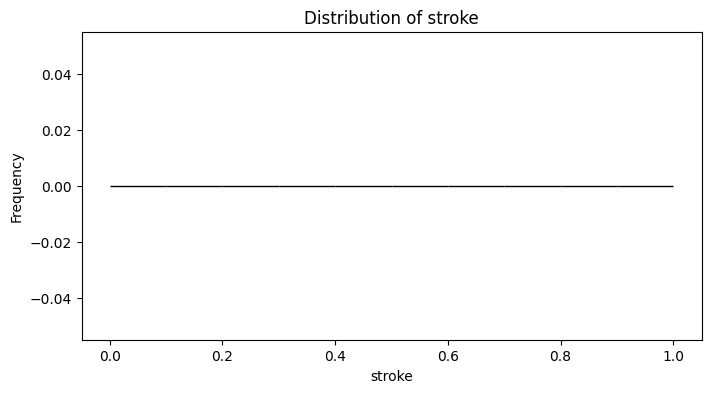

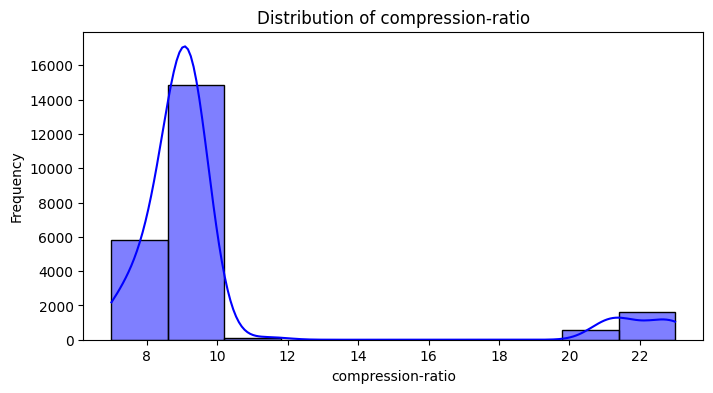

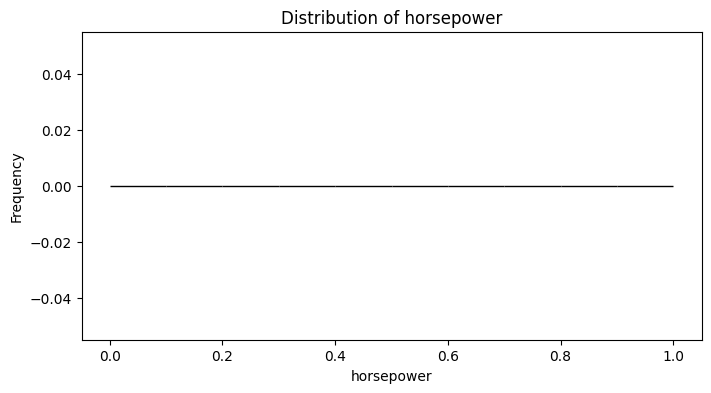

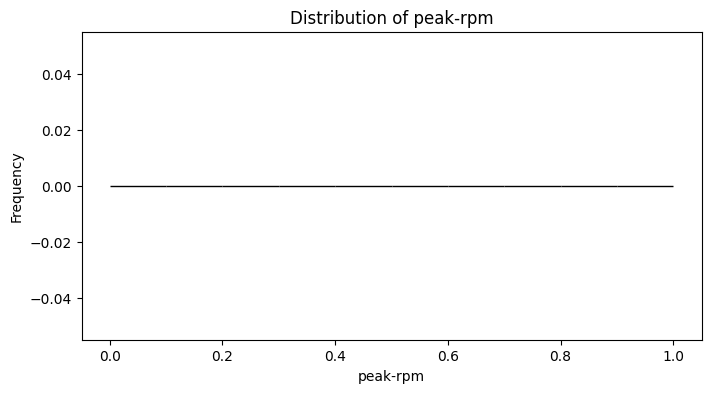

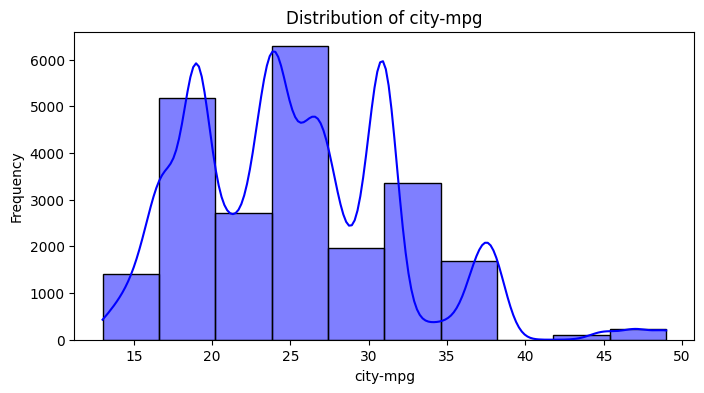

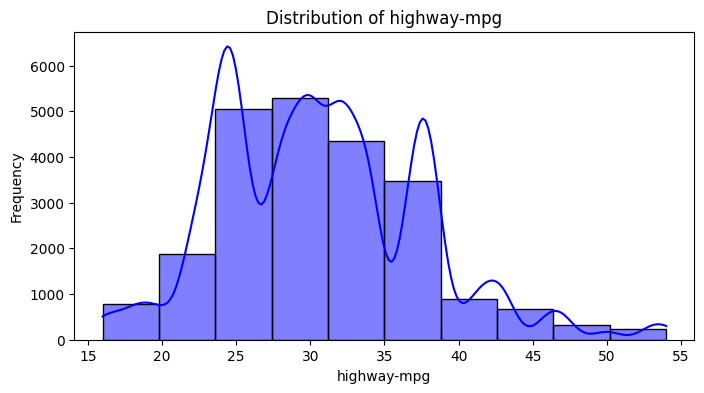

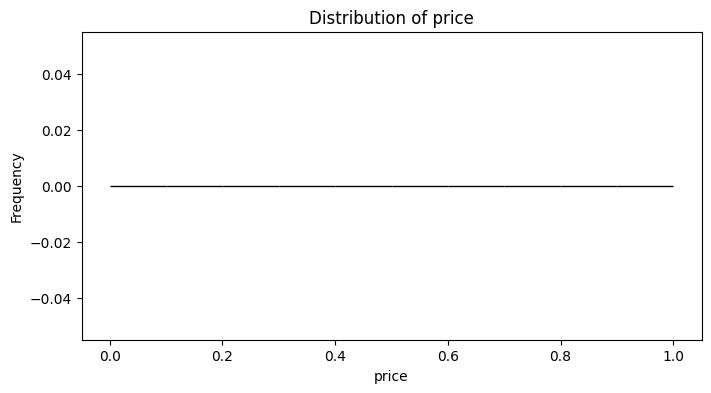

In [ ]:
# plotting numerical features to see distribution
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=10, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
df_objective.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25874 entries, 0 to 25873
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   make              22905 non-null  object
 1   fuel-type         22982 non-null  object
 2   aspiration        23031 non-null  object
 3   num-of-doors      22971 non-null  object
 4   body-style        22999 non-null  object
 5   drive-wheels      22884 non-null  object
 6   engine-location   23024 non-null  object
 7   engine-type       22962 non-null  object
 8   num-of-cylinders  22953 non-null  object
 9   fuel-system       22930 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


We'll work on numerical features.

In [ ]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25874 entries, 0 to 25873
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          22961 non-null  float64
 1   normalized-losses  18293 non-null  float64
 2   wheel-base         22930 non-null  float64
 3   length             22921 non-null  float64
 4   width              23054 non-null  float64
 5   height             22934 non-null  float64
 6   curb-weight        22977 non-null  float64
 7   engine-size        22944 non-null  float64
 8   bore               22592 non-null  float64
 9   stroke             22622 non-null  float64
 10  compression-ratio  23007 non-null  float64
 11  horsepower         22628 non-null  float64
 12  peak-rpm           22791 non-null  float64
 13  city-mpg           22916 non-null  float64
 14  highway-mpg        22972 non-null  float64
 15  price              22479 non-null  float64
dtypes: float64(16)
memory 

In [ ]:
for column in df_numerical.select_dtypes(include=['number']).columns:
    print(f"Value counts for {column}:")
    print(df_numerical[column].value_counts())
    print()

Value counts for symboling:
symboling
 0.0    10479
 1.0     5965
 2.0     3586
 3.0     3092
-1.0     2436
-2.0      316
Name: count, dtype: int64

Value counts for normalized-losses:
normalized-losses
161.0    1294
91.0      870
150.0     800
104.0     710
134.0     678
128.0     645
102.0     606
94.0      570
85.0      557
65.0      546
95.0      538
168.0     535
103.0     529
74.0      514
93.0      468
106.0     459
122.0     435
148.0     434
118.0     413
125.0     346
137.0     338
83.0      325
154.0     322
115.0     318
101.0     311
197.0     248
153.0     242
188.0     238
145.0     236
113.0     233
108.0     232
119.0     232
81.0      230
194.0     228
110.0     227
129.0     225
89.0      214
87.0      209
158.0     207
164.0     205
192.0     198
121.0     126
256.0     125
77.0      123
90.0      114
142.0     113
186.0     112
231.0     110
98.0      107
78.0      102
107.0      96
Name: count, dtype: int64

Value counts for wheel-base:
wheel-base
94.5     2335
93

Checking correlation of all numeric columns

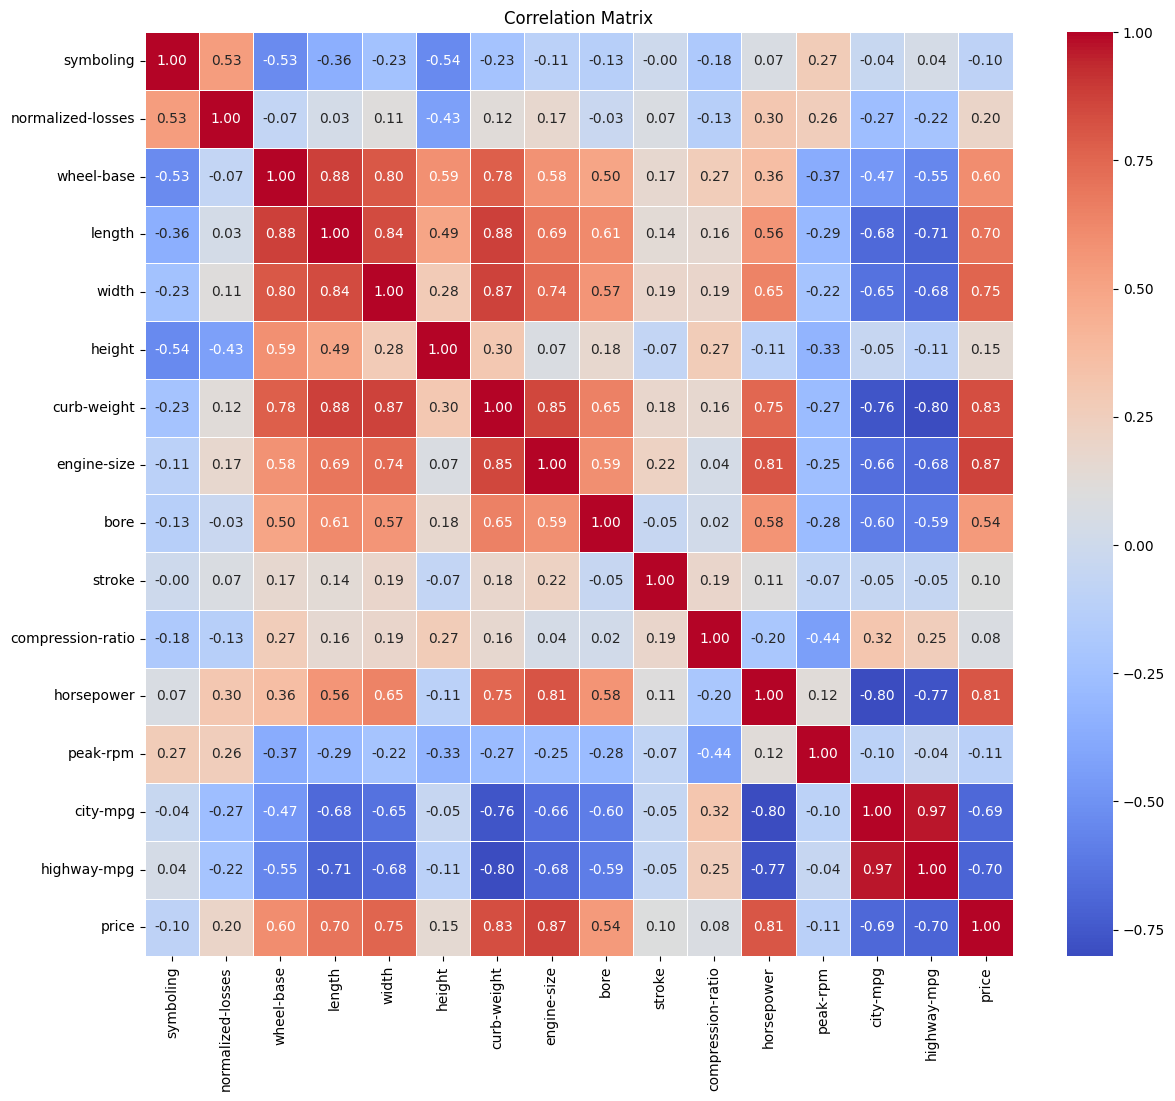

In [ ]:
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Now we need to figure out how to fill NA values in numerical Values

For some columns we fill with the mean values

For the remaining column we fill with the 50% quartile range value





- Mean:

Best for numerical data that is normally distributed (symmetric) since the mean represents the central tendency of the data.
However, it is sensitive to outliers, which can distort the results.

- Median:

Better for skewed data or when there are outliers, as it represents the middle value and is not affected by extreme values.

normalized-losses =	 mean

wheel-base	= mean

length	= mean

width	= mean

height	= mean

curb-weight	= 50%

engine-size	= 50%

bore	= mean

stroke	= mean

compression-ratio	= 50%

horsepower	= 50%

peak-rpm	= mean

city-mpg	= 50%

highway-mpg	= 50%

price = mean

In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,22961.000000,18293.000000,22930.000000,22921.000000,23054.000000,22934.000000,22977.000000,22944.000000,22592.000000,22622.000000,23007.000000,22628.000000,22791.000000,22916.000000,22972.000000,22479.000000
mean,0.842516,122.399606,98.812290,174.168317,65.920114,53.733034,2560.221265,127.322394,3.330293,3.257518,10.121975,104.724854,5122.364091,25.148543,30.700200,13236.826905
std,1.244124,35.483240,6.044476,12.384015,2.148439,2.435949,521.624698,41.817912,0.272375,0.316453,3.941974,39.741665,478.544993,6.536613,6.883403,7945.676396
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10345.000000
75%,2.000000,150.000000,102.400000,183.500000,66.900000,55.500000,2954.000000,146.000000,3.590000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
median_num_features = ['symboling','curb-weight','engine-size', 'compression-ratio','horsepower','city-mpg' ,'highway-mpg', 'price']
df_median_num_features = df[median_num_features]
df_median_num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25874 entries, 0 to 25873
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          22961 non-null  float64
 1   curb-weight        22977 non-null  float64
 2   engine-size        22944 non-null  float64
 3   compression-ratio  23007 non-null  float64
 4   horsepower         22628 non-null  float64
 5   city-mpg           22916 non-null  float64
 6   highway-mpg        22972 non-null  float64
 7   price              22479 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


In [ ]:
mean_num_features = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'bore', 'stroke', 'peak-rpm']
df_mean_num_features = df[mean_num_features]
df_mean_num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25874 entries, 0 to 25873
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  18293 non-null  float64
 1   wheel-base         22930 non-null  float64
 2   length             22921 non-null  float64
 3   width              23054 non-null  float64
 4   height             22934 non-null  float64
 5   bore               22592 non-null  float64
 6   stroke             22622 non-null  float64
 7   peak-rpm           22791 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


Fill the features with mean and median values respectively

In [ ]:
df_median_num_features = df[median_num_features].apply(lambda col: col.fillna(col.median()), axis=0)

In [ ]:
df_mean_num_features = df[mean_num_features].apply(lambda col: col.fillna(col.mean()), axis=0)

Vertical Concatenation

In [ ]:
df_numerical = pd.concat([df_mean_num_features, df_median_num_features], axis=1)

In [ ]:
df_numerical

,normalized-losses,wheel-base,length,width,height,bore,stroke,peak-rpm,symboling,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
0,122.399606,88.6,168.800000,64.100000,53.733034,3.470000,2.680000,5122.364091,3.0,2548.0,120.0,9.0,111.0,21.0,27.0,13495.0
1,122.399606,88.6,168.800000,64.100000,48.800000,3.470000,2.680000,5122.364091,3.0,2548.0,130.0,9.0,111.0,21.0,27.0,16500.0
2,122.399606,94.5,171.200000,65.500000,52.400000,3.330293,3.470000,5122.364091,1.0,2823.0,152.0,9.0,154.0,19.0,26.0,16500.0
3,164.000000,99.8,176.600000,66.200000,54.300000,3.190000,3.257518,5500.000000,2.0,2337.0,109.0,10.0,102.0,24.0,30.0,13950.0
4,164.000000,99.4,174.168317,65.920114,54.300000,3.330293,3.400000,5500.000000,2.0,2824.0,136.0,8.0,115.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25869,102.000000,97.0,172.000000,65.400000,54.300000,3.620000,2.640000,4800.000000,0.0,2385.0,108.0,9.0,82.0,24.0,30.0,9233.0
25870,150.000000,95.3,169.000000,65.700000,49.600000,3.330293,3.257518,5122.364091,3.0,2500.0,80.0,9.4,135.0,24.0,30.0,15645.0
25871,168.000000,94.5,168.700000,64.000000,52.600000,3.240000,3.257518,6600.000000,1.0,2300.0,98.0,9.4,112.0,26.0,29.0,9538.0
25872,186.000000,94.5,168.900000,65.920114,50.200000,3.940000,3.257518,5500.000000,3.0,2778.0,151.0,9.5,143.0,19.0,27.0,22018.0


In [ ]:
df_numerical.isnull().sum()

,0
normalized-losses,0
wheel-base,0
length,0
width,0
height,0
bore,0
stroke,0
peak-rpm,0
symboling,0
curb-weight,0


##Categorical Data Cleaning

In [ ]:
df_objective.isnull().sum()

,0
make,2969
fuel-type,2892
aspiration,2843
num-of-doors,2903
body-style,2875
drive-wheels,2990
engine-location,2850
engine-type,2912
num-of-cylinders,2921
fuel-system,2944


In [ ]:
df.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,22905,22982,23031,22971,22999,22884,23024,22962,22953,22930
unique,22,2,2,3,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,3568,20773,18807,12819,10738,13272,22722,16472,17723,10560


In [ ]:
objective_features = [
    'make','fuel-type', 'aspiration', 'num-of-doors', 'body-style',
    'drive-wheels', 'engine-location', 'engine-type',
    'num-of-cylinders', 'fuel-system'
]

df_objective_features = df[objective_features]
df_objective_features.shape

(25874, 10)

In [ ]:
for feature in objective_features:
    print(f"Frequency Table for '{feature}':")
    print(df[feature].value_counts())
    print("\n")

Frequency Table for 'make':
make
toyota           3568
nissan           1956
mazda            1904
mitsubishi       1521
honda            1396
subaru           1377
volkswagen       1356
peugot           1244
volvo            1163
dodge             983
bmw               921
mercedes-benz     915
audi              766
plymouth          763
saab              706
porsche           539
isuzu             474
chevrolet         355
jaguar            338
alfa-romero       338
renault           218
mercury           104
Name: count, dtype: int64


Frequency Table for 'fuel-type':
fuel-type
gas       20773
diesel     2209
Name: count, dtype: int64


Frequency Table for 'aspiration':
aspiration
std      18807
turbo     4224
Name: count, dtype: int64


Frequency Table for 'num-of-doors':
num-of-doors
four    12819
two      9932
?         220
Name: count, dtype: int64


Frequency Table for 'body-style':
body-style
sedan          10738
hatchback       7893
wagon           2833
hardtop          851
c

<ipython-input-118-08b157b7d217>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_objective_features, x=feature, palette="viridis")


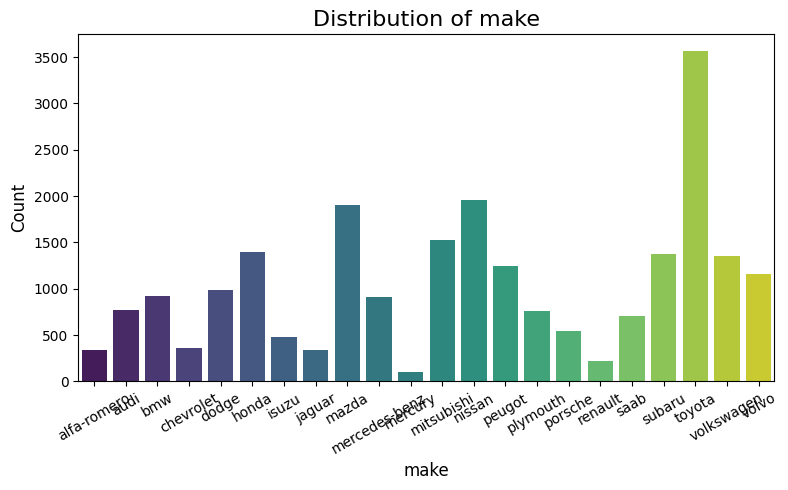

<ipython-input-118-08b157b7d217>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_objective_features, x=feature, palette="viridis")


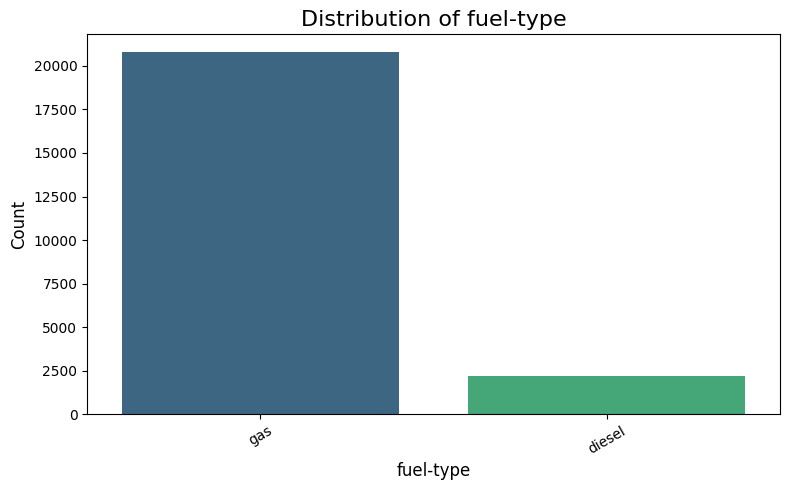

<ipython-input-118-08b157b7d217>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_objective_features, x=feature, palette="viridis")


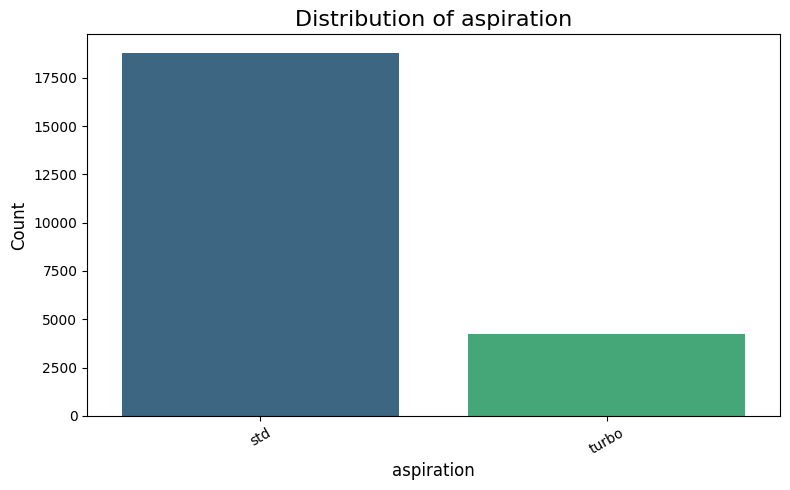

<ipython-input-118-08b157b7d217>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_objective_features, x=feature, palette="viridis")


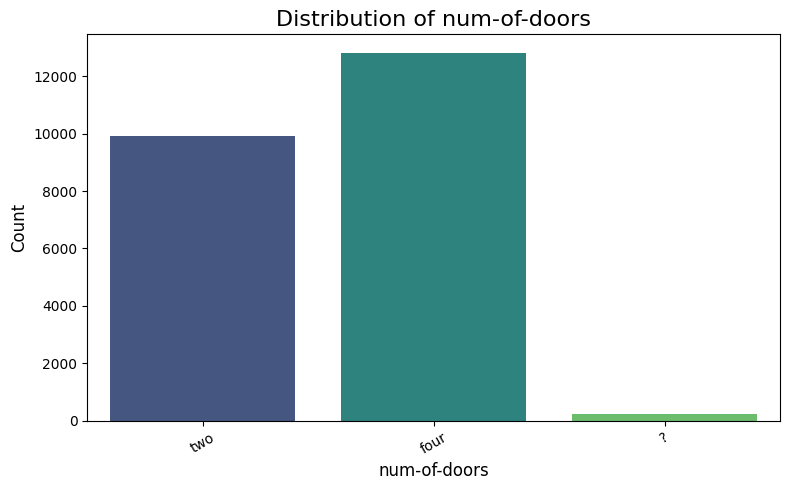

<ipython-input-118-08b157b7d217>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_objective_features, x=feature, palette="viridis")


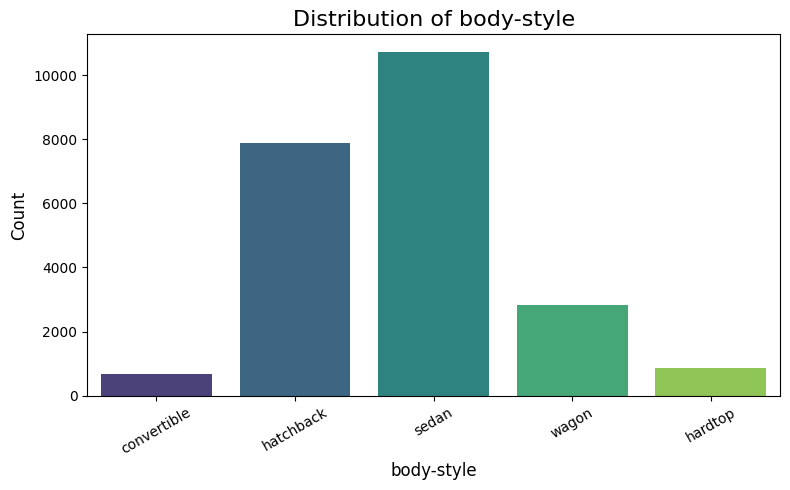

<ipython-input-118-08b157b7d217>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_objective_features, x=feature, palette="viridis")


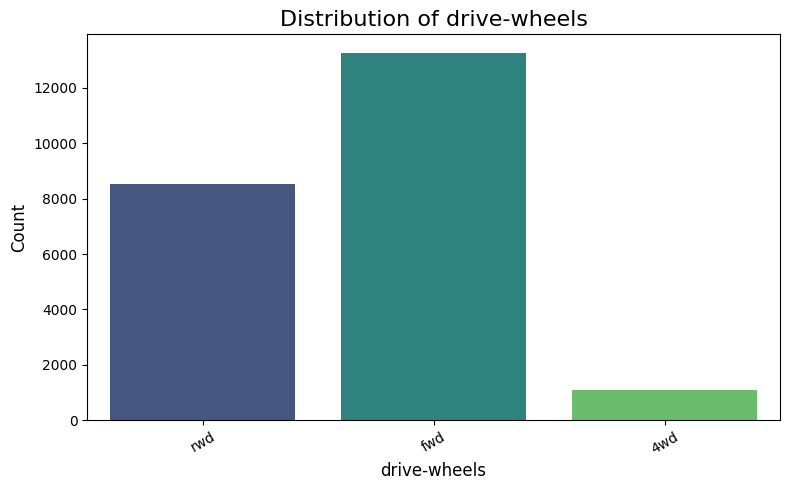

<ipython-input-118-08b157b7d217>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_objective_features, x=feature, palette="viridis")


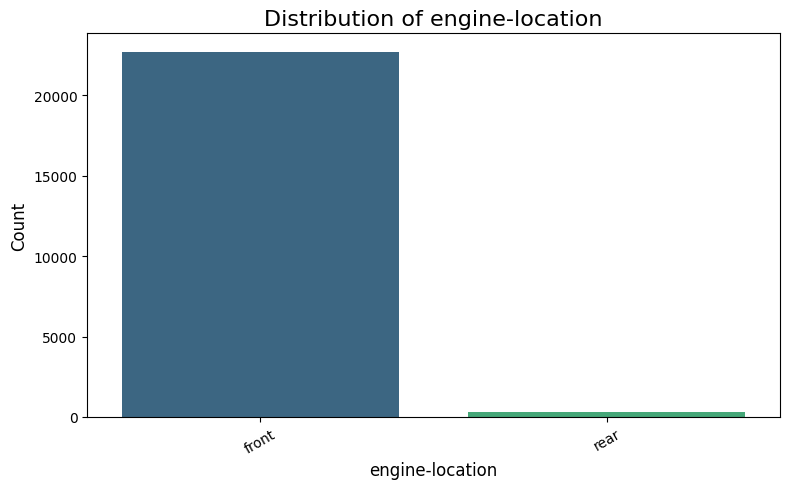

<ipython-input-118-08b157b7d217>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_objective_features, x=feature, palette="viridis")


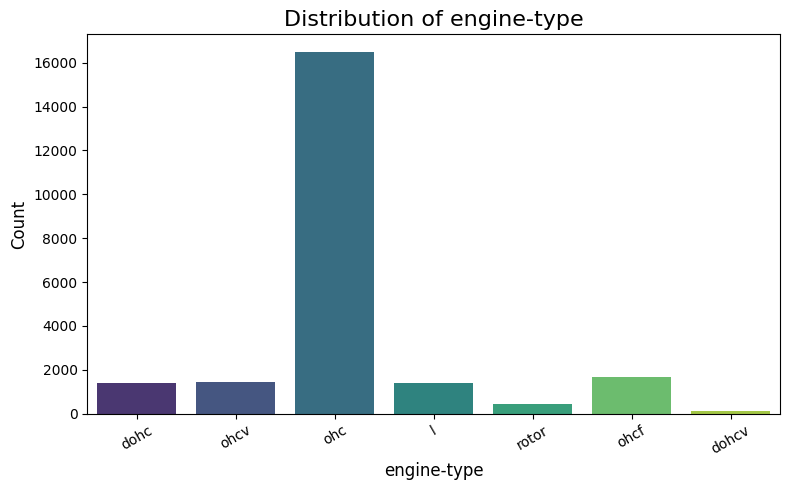

<ipython-input-118-08b157b7d217>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_objective_features, x=feature, palette="viridis")


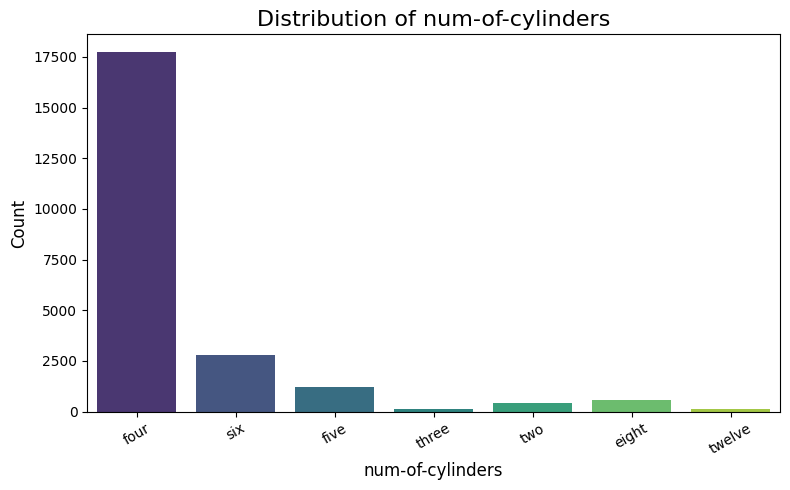

<ipython-input-118-08b157b7d217>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_objective_features, x=feature, palette="viridis")


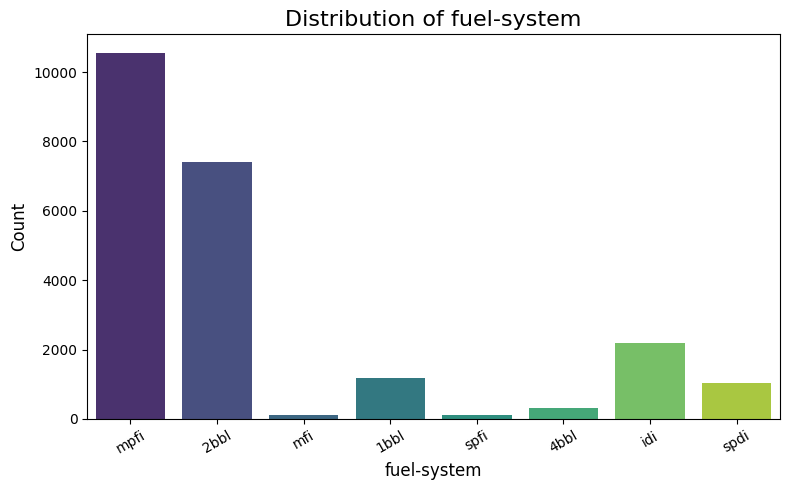

In [ ]:
for feature in objective_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_objective_features, x=feature, palette="viridis")
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

Now we have to first remove incorrect data

In [ ]:
df['num-of-doors'].replace('?', np.nan, inplace=True)

<ipython-input-119-fd91fe5726f5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].replace('?', np.nan, inplace=True)


make	| impute with unknown

fuel-type	| mode

aspiration	| mode

num-of-doors	replace with (?  ,220) mode | mode value in NAn value

body-style	| unknown - value in NAn value

drive-wheels	| unknown - value in NAn value

engine-location	| mode value in NAn value (missing values are low)

engine-type | unknown - value in NAn value

num-of-cylinders | 	mode value in NAn value

fuel-system |  unknown - value in NAn value

- I assume the missing values are random (Missing Completely at Random - MCAR).
-  Impute features with the mode value, as it minimally alters the data.
- Add a new category like (**unknown**) to avoid excessive bias toward the most common category. also the most repeated value is less than 50% of the data

In [ ]:
unknown_objective_features = ['make', 'body-style', 'drive-wheels', 'engine-type','num-of-cylinders', 'fuel-system']
df_unknown_objective_features = df[unknown_objective_features]

In [ ]:
for col in unknown_objective_features:
    df_unknown_objective_features[col].fillna('Unknown', inplace=True)

In [ ]:
mode_objective_features = ['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']
df_mode_objective_features = df[mode_objective_features]

In [ ]:
for col in mode_objective_features:
   df_mode_objective_features[col].fillna(df_mode_objective_features[col].mode()[0], inplace=True)

<ipython-input-122-f1828548bed6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode_objective_features[col].fillna(df_mode_objective_features[col].mode()[0], inplace=True)
<ipython-input-122-f1828548bed6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mode_objective_features[col].fillna(df_mode_objective_features[col].mode()[0], inp

In [ ]:
df_categorical = pd.concat([df_mode_objective_features, df_unknown_objective_features], axis=1)

In [ ]:
df_categorical.isnull().sum()

,0
fuel-type,0
aspiration,0
num-of-doors,0
engine-location,0
make,0
body-style,0
drive-wheels,0
engine-type,0
num-of-cylinders,0
fuel-system,0


In [ ]:
df_clean = pd.concat([df_categorical, df_numerical], axis=1)
df_clean.shape

(25874, 26)

# Task 4



Exploratory Data Analysis (EDA)

- Visualize Target feature distribution
- Check the skewness of the target variable
- Visualize total No. of cars sold by different companys
- Visualizing Car Company with Price
- Correlation of Numerical features with Price(Target variable)

- Visualize Target feature distribution
- Check the skewness of the target variable



The Target Feature is right skewed, with outliers

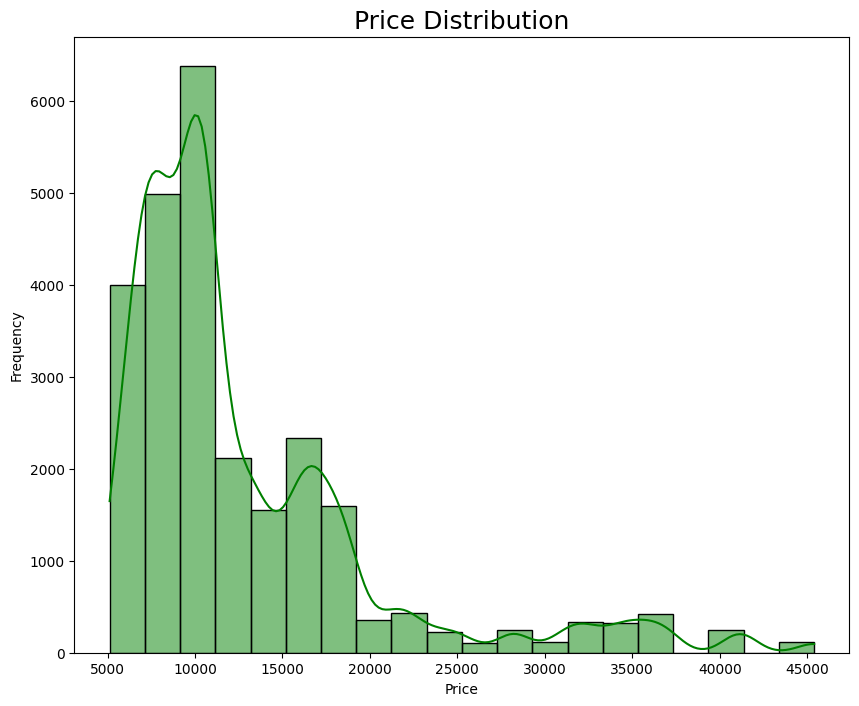

Skewness of the 'price' feature: 2.027626347880451


In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df_numerical['price'], kde=True, color='green', bins=20)


plt.title('Price Distribution', fontsize=18)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Frequency', fontsize=10)


plt.show()

skewness = df_numerical['price'].skew()
print(f"Skewness of the 'price' feature: {skewness}")

- Visualize total No. of cars sold by different companys

In [ ]:
df_categorical['make'].value_counts()

,count
make,
toyota,3568
Unknown,2969
nissan,1956
mazda,1904
mitsubishi,1521
honda,1396
subaru,1377
volkswagen,1356
peugot,1244


<ipython-input-128-f2700c8c8cf8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=make_counts.index, y=make_counts.values, palette='viridis')


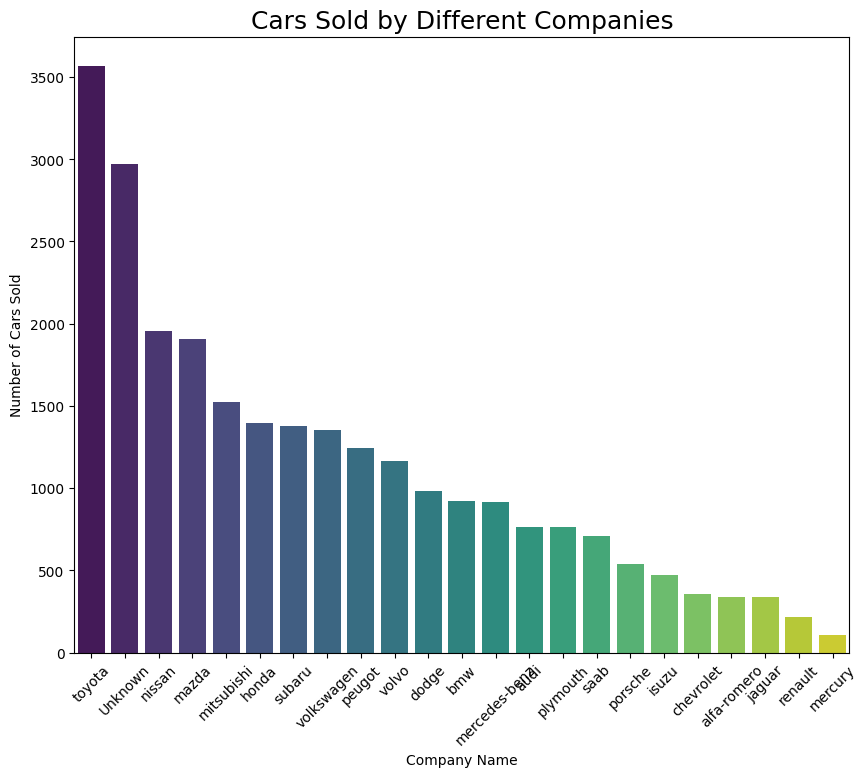

In [ ]:
make_counts = df_categorical['make'].value_counts()


plt.figure(figsize=(10, 8))
sns.barplot(x=make_counts.index, y=make_counts.values, palette='viridis')

# Add titles and labels
plt.title('Cars Sold by Different Companies', fontsize=18)
plt.xlabel('Company Name', fontsize=10)
plt.ylabel('Number of Cars Sold', fontsize=10)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

- Visualizing Car Company with Price


In [ ]:
df1_reset = df_numerical.reset_index(drop=False).rename(columns={'index': 'index_df1'})
df2_reset = df_categorical.reset_index(drop=False).rename(columns={'index': 'index_df2'})

df_orignal = pd.concat([df1_reset, df2_reset], axis=1)

df_orignal = df_orignal.drop(columns=['index_df1', 'index_df2'])

df_orignal.head()

,normalized-losses,wheel-base,length,width,height,bore,stroke,peak-rpm,symboling,curb-weight,...,fuel-type,aspiration,num-of-doors,engine-location,make,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system
0,122.399606,88.6,168.800000,64.100000,53.733034,3.470000,2.680000,5122.364091,3.0,2548.0,...,gas,std,two,front,alfa-romero,convertible,rwd,dohc,Unknown,mpfi
1,122.399606,88.6,168.800000,64.100000,48.800000,3.470000,2.680000,5122.364091,3.0,2548.0,...,gas,std,two,front,alfa-romero,convertible,rwd,Unknown,four,mpfi
2,122.399606,94.5,171.200000,65.500000,52.400000,3.330293,3.470000,5122.364091,1.0,2823.0,...,gas,std,two,front,alfa-romero,hatchback,rwd,ohcv,six,mpfi
3,164.000000,99.8,176.600000,66.200000,54.300000,3.190000,3.257518,5500.000000,2.0,2337.0,...,gas,std,four,front,audi,sedan,fwd,ohc,four,mpfi
4,164.000000,99.4,174.168317,65.920114,54.300000,3.330293,3.400000,5500.000000,2.0,2824.0,...,gas,std,four,front,audi,sedan,4wd,Unknown,five,mpfi


<ipython-input-130-1cea70ff8de0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='make', y='price', data=df_orignal, palette='viridis')


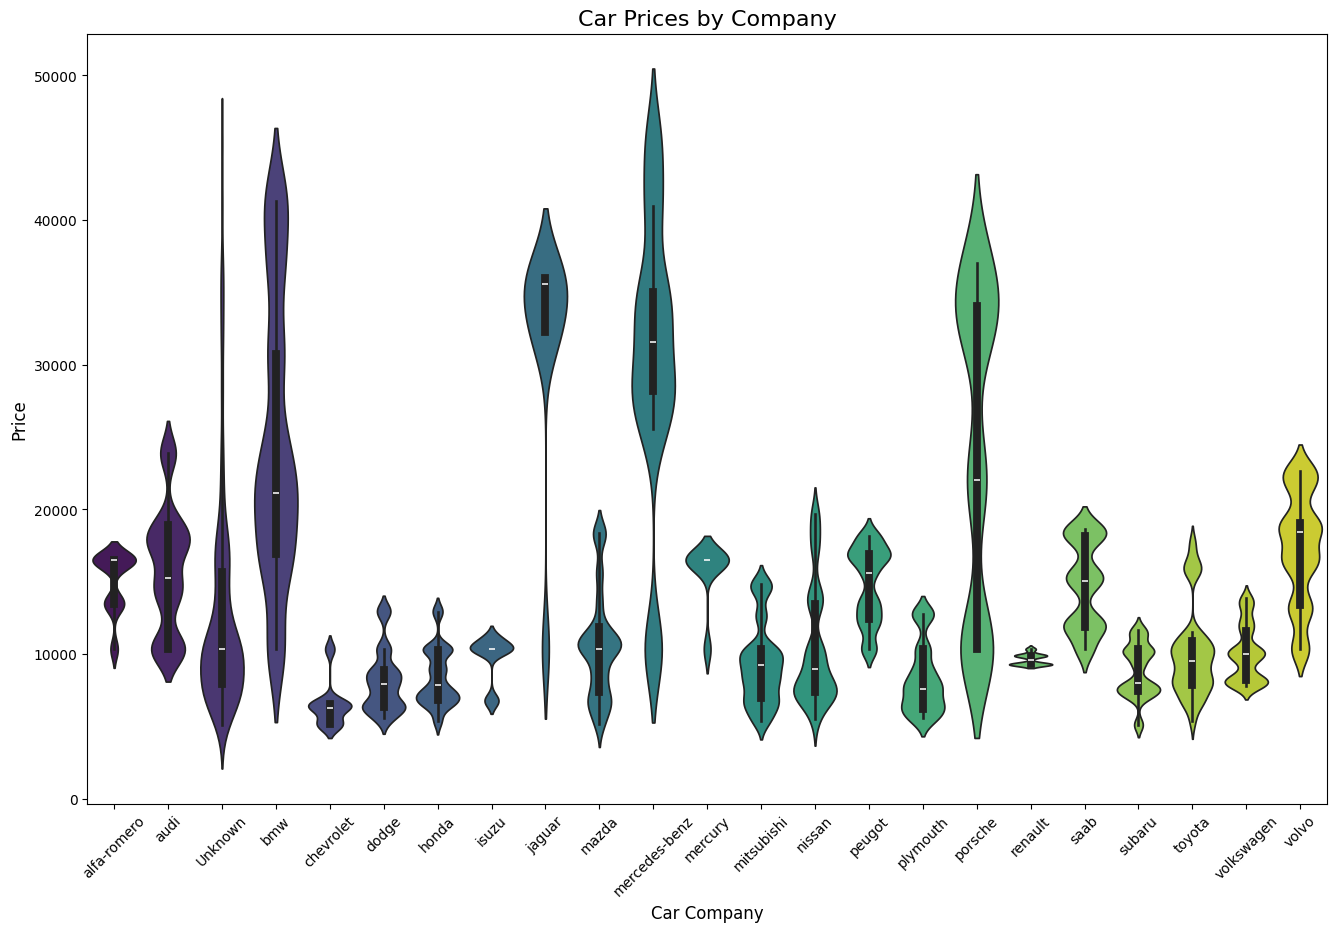

In [ ]:
plt.figure(figsize=(16, 10))
sns.violinplot(x='make', y='price', data=df_orignal, palette='viridis')

plt.title('Car Prices by Company', fontsize=16)
plt.xlabel('Car Company', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.xticks(rotation=45)

plt.show()

- Correlation of Numerical features with Price(Target variable)

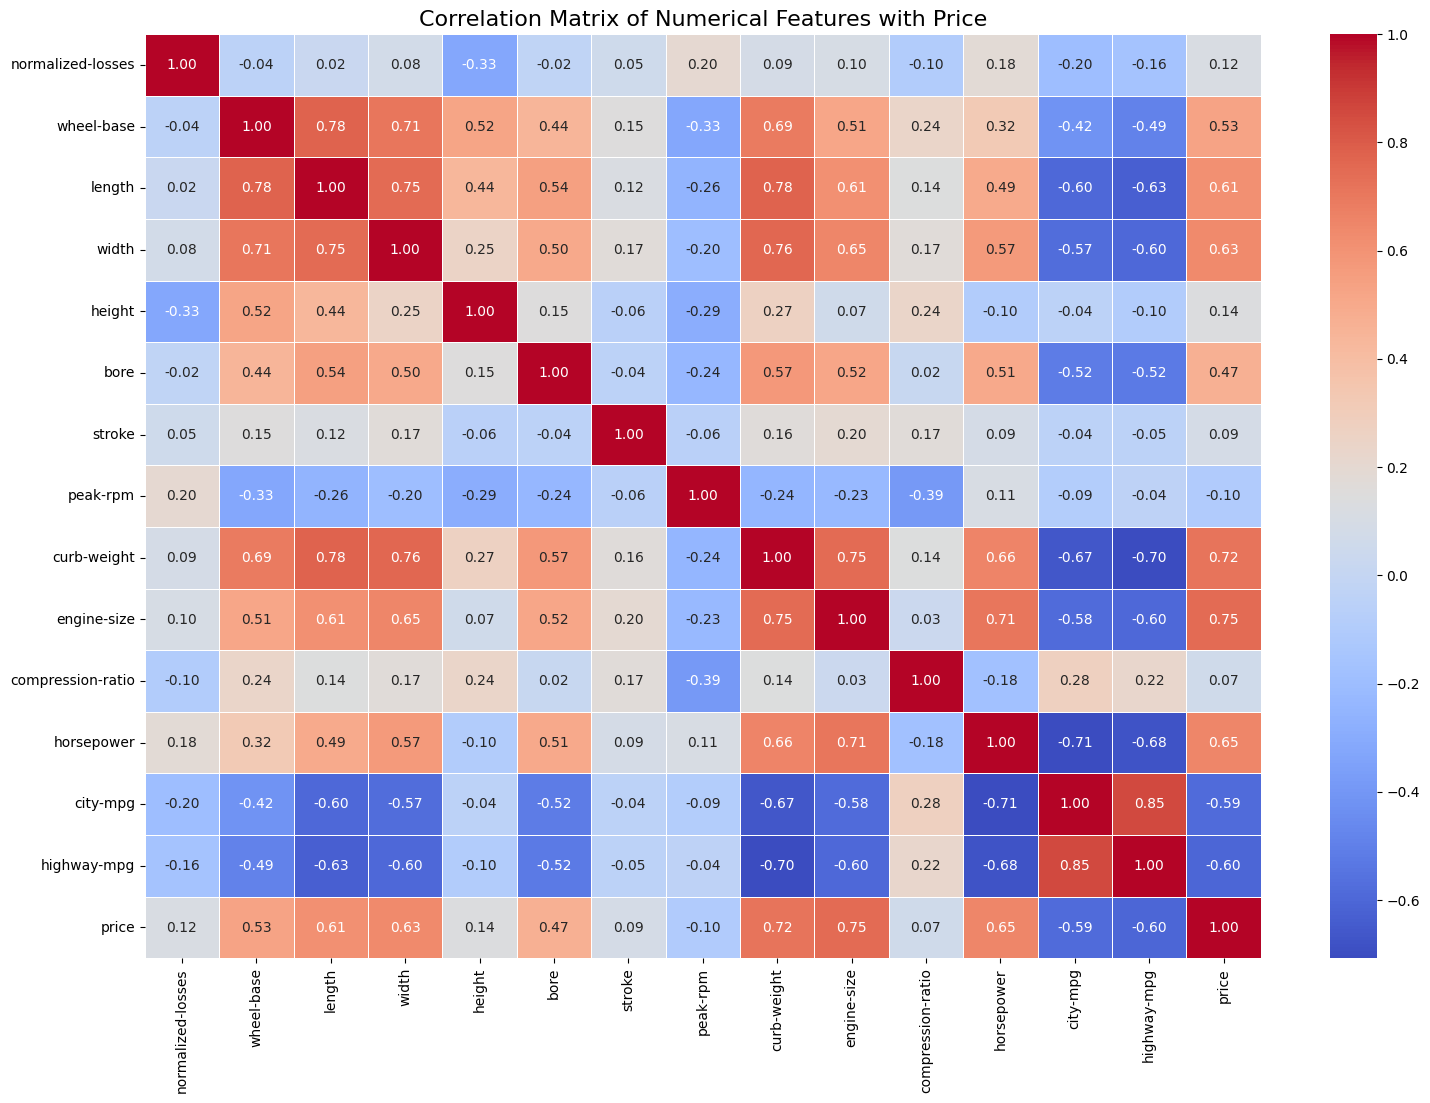

In [ ]:
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(18,12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=True)

plt.title('Correlation Matrix of Numerical Features with Price', fontsize=16)

plt.show()

#Task 5

Separate the features and target variables

In [ ]:
X = df_clean.drop(columns=['price'])
y = df_clean['price']

In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

#Task 6
Creating Data Preprocessing Pipelines
- Scaling the numerical columns
- Encoding the categorical columns
- Visualize the pipeline

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [ ]:
set_config(display='diagram')
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'bore',
       'stroke', 'peak-rpm', 'symboling', 'curb-weight', 'engine-size',
       'compression-ratio', 'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['fuel-type', 'aspiration', 'num-of-doors', 'engine-location', 'make',
       'body-style', 'drive-wheels', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object'))])

#Task 7

Split the data set into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=47)

#Task 8 - Model Building

Train model using different Machine Learning Algorithms such as:
- Multiple Linear Regressor
- Decision Tree Regressor
- KNN Regressor
- Random Forest Regressor
- Gradient Boosting Regressor

In [ ]:
models = {
    'Multiple Linear Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Decision Tree Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(random_state=42))
    ]),
    'KNN Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', KNeighborsRegressor())
    ]),
    'Random Forest Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ]),
    'Gradient Boosting Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(random_state=42))
    ])
}

# Task 9

Evaluate the model's performance using MSE and R2 score. Also compare the different model's performances based on the high accuracy achieved and low Mean Square Error.

In [ ]:
model_results = []

for model_name, model_pipeline in models.items():
    print(f"Training {model_name}...")
    model_pipeline.fit(X_train, y_train)

    y_pred = model_pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_results.append({
        'Model': model_name,
        'MSE': mse,
        'R2': r2
    })

    print(f"{model_name} - Mean Squared Error: {mse:.4f}, R²: {r2:.4f}\n")

results_df = pd.DataFrame(model_results)

best_model = results_df.loc[results_df['R2'].idxmax()]
print(f"Best Model: {best_model['Model']} with R²: {best_model['R2']:.4f}\n")

Training Multiple Linear Regressor...
Multiple Linear Regressor - Mean Squared Error: 11426030.8592, R²: 0.7997

Training Decision Tree Regressor...
Decision Tree Regressor - Mean Squared Error: 15597235.3365, R²: 0.7266

Training KNN Regressor...
KNN Regressor - Mean Squared Error: 9311722.4298, R²: 0.8368

Training Random Forest Regressor...
Random Forest Regressor - Mean Squared Error: 10151569.0789, R²: 0.8221

Training Gradient Boosting Regressor...
Gradient Boosting Regressor - Mean Squared Error: 8591064.8814, R²: 0.8494

Best Model: Gradient Boosting Regressor with R²: 0.8494

